In [64]:
# import important modules
import numpy as np
import pandas as pd
# sklearn modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB  # classifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    plot_confusion_matrix,
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# text preprocessing modules
from string import punctuation
# text preprocessing modules
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re  # regular expression

# Download dependency
for dependency in (
        "brown",
        "names",
        "wordnet",
        "averaged_perceptron_tagger",
        "universal_tagset",
):
    nltk.download(dependency)

import warnings

warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [41]:
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 10.8 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 5.5 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 9.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 8.0 MB/s eta 0:00:00
     -------------------------------------- 895.7/895.7 kB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 10.5 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 93.3/93.3

In [3]:
import random
random.seed(42) 
import matplotlib.pyplot as plt
import seaborn as sns

# Inline plots in Jupyter notebooks
%matplotlib inline

# better display of review text in dataframes
pd.set_option('display.max_colwidth', 15) 

# Seaborn style
sns.set(style="whitegrid")

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# load data
data = pd.read_csv("allocine_inception_avis9.csv")

In [7]:
# show top five rows of data
data.head()

,Note,Description,key
0,"5,0",Après le ch...,0
1,"5,0",C’est fou c...,1
2,"5,0",CHEF D’ŒUVR...,2
3,"5,0",Un film aus...,3
4,"5,0",Christopher...,4


In [8]:
# check the shape of the data
data.shape

(7214, 3)

In [9]:
# check missing values in data
data.isnull().sum()

Note           0
Description    1
key            0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(7213, 3)

In [12]:
# evalute news sentiment distribution
data.Note.value_counts()

5,0    3513
4,5    1214
4,0     808
0,5     344
3,0     310
3,5     294
2,0     259
2,5     193
1,0     186
1,5      92
Name: Note, dtype: int64

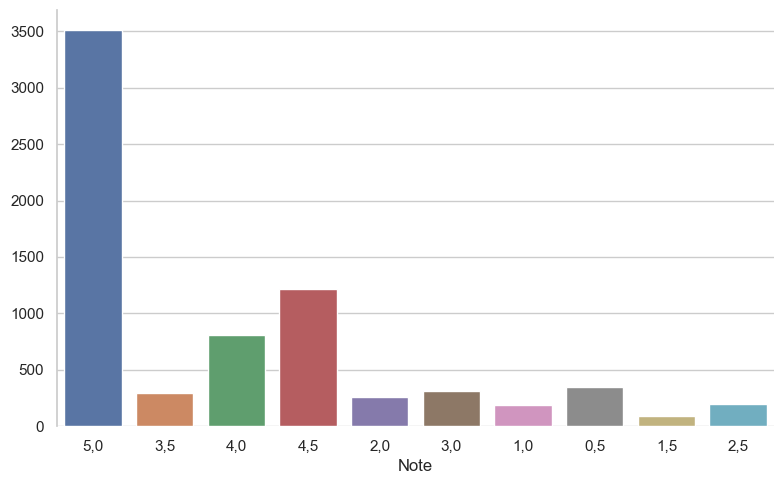

In [13]:
#Rating counts
plt.figure(figsize=(8,5))

ax = sns.countplot(data=data, x='Note')
ax.set(xlabel='Note', ylabel='')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('note_counts.png', dpi=200)

In [14]:
def setClassBin(i):
    if (float(i.replace(',', '.')) >= 4.5):
        return 1
    elif (float(i.replace(',', '.')) <= 2.0):
        return -1
    else:
        return 0

data['Note'] = [setClassBin(x) for x in data.Note]


In [15]:
# evalute news sentiment distribution
data.Note.value_counts()

 1    4727
 0    1605
-1     881
Name: Note, dtype: int64

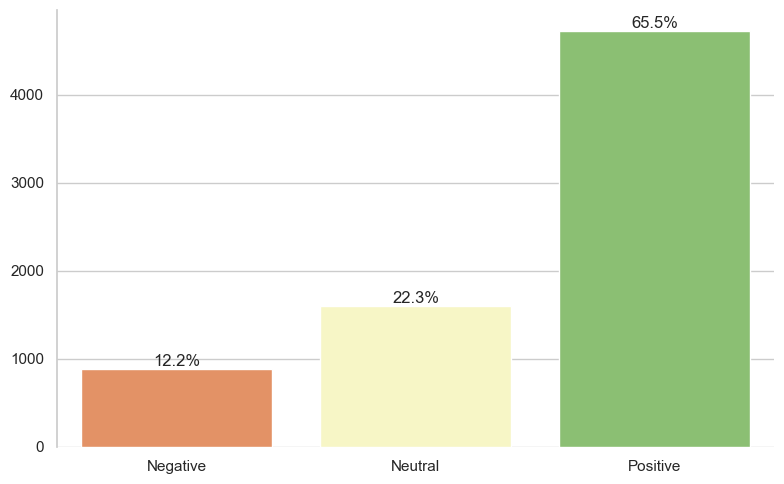

In [16]:
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=3)
goodbad_palette.reverse()

ax = sns.countplot(data=data, x='Note', palette=goodbad_palette)
ax.set(xlabel='', ylabel='')
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])

# Frenquencies
ncount = len(data)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('polarity_frequency.png', dpi=200)

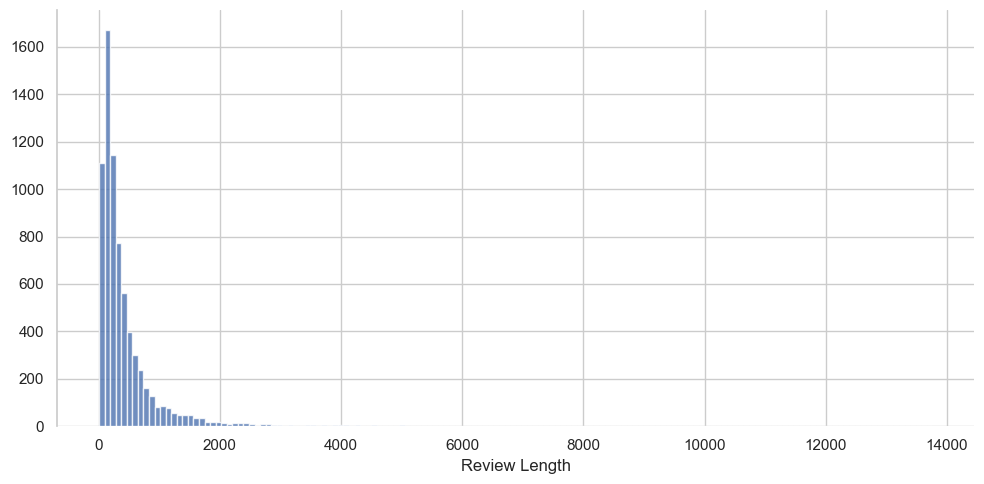

In [17]:
#Reviews length
reviews_length = data['Description'].str.len()

plt.figure(figsize=(10,5))
ax = sns.distplot(reviews_length, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('reviews_length.png', dpi=200)

In [18]:
THRESHOLD = 2000
short_reviews = data[data['Description'].str.len() <= THRESHOLD]
long_reviews =  data[data['Description'].str.len() > THRESHOLD]

print("{} reviews with LEN > {} ({:.2f} % of total data)".format(
    len(long_reviews),
    THRESHOLD,
    100 * len(long_reviews) / len(data)
))

169 reviews with LEN > 2000 (2.34 % of total data)


In [19]:
long_reviews.head(1)

,Note,Description,key
1,1,C’est fou c...,1


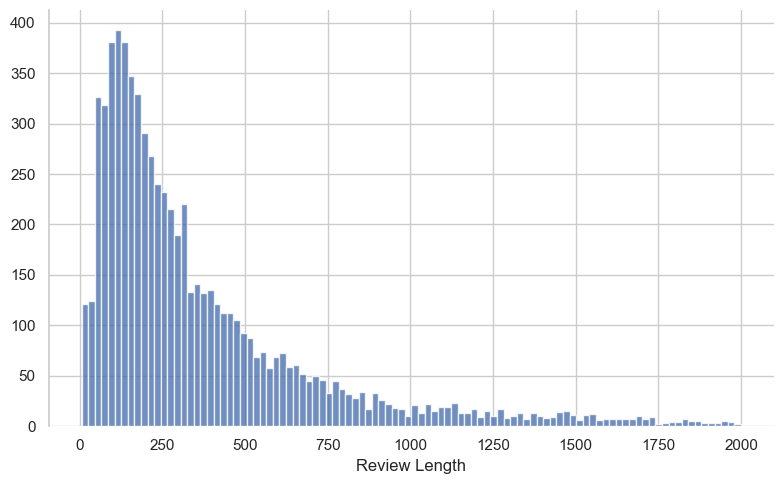

In [20]:
short_reviews_length = short_reviews['Description'].str.len()

plt.figure(figsize=(8,5))
ax = sns.distplot(short_reviews_length, bins=100, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('short_reviews_length.png', dpi=200)

In [21]:
data.head(5)

,Note,Description,key
0,1,Après le ch...,0
1,1,C’est fou c...,1
2,1,CHEF D’ŒUVR...,2
3,1,Un film aus...,3
4,1,Christopher...,4


In [22]:
#Build dataset
dataset_df = data.copy()
initial_len = len(dataset_df)
print("Length: {}".format(initial_len))

Length: 7213


In [23]:
def loss_percentage(df, previous_length):
    new_length = len(df)
    percentage = 100*(1-(new_length/previous_length))    
    return new_length, percentage  

In [24]:
# 2. Drop rows we don't need (neutral polarity)
dataset_df = dataset_df[dataset_df['Note'] != 0]
length, percentage = loss_percentage(dataset_df, initial_len)
print("Length: {} (-{:.1f} %)".format(length, percentage))

Length: 5608 (-22.3 %)


In [25]:
# Change -1 to 0 for negative polarity
dataset_df.loc[dataset_df['Note'] == -1, 'Note'] = 0

In [26]:
dataset_df.groupby('Note').size()

Note
0     881
1    4727
dtype: int64

In [34]:
# Separate the description and the note
description, note = list(dataset_df.Description), list(dataset_df.Note)

In [35]:
# Remove reviews with less than 3 characters
# Done after text processing on purpose
dataset_df = dataset_df[dataset_df['Description'].str.len() > 2]

In [43]:
# Build the raw vocobulary for first inspection
tokenizer = Tokenizer()
tokenizer.fit_on_texts(description)
vocab_raw = tokenizer.word_index
print('\nThe vocabulary size: {}\n'.format(len(vocab_raw)))
print(vocab_raw)


The vocabulary size: 19381

{'de': 1, 'et': 2, 'le': 3, 'un': 4, 'film': 5, 'la': 6, 'à': 7, 'est': 8, 'les': 9, 'une': 10, 'que': 11, 'qui': 12, 'ce': 13, 'pas': 14, 'en': 15, 'des': 16, 'du': 17, 'dans': 18, 'a': 19, 'pour': 20, 'je': 21, 'tout': 22, 'on': 23, 'ne': 24, 'mais': 25, 'nolan': 26, 'très': 27, 'il': 28, 'plus': 29, 'bien': 30, 'au': 31, 'scénario': 32, 'avec': 33, "c'est": 34, 'nous': 35, 'son': 36, 'voir': 37, 'se': 38, 'par': 39, 'sont': 40, 'acteurs': 41, 'inception': 42, 'comme': 43, 'sur': 44, 'fait': 45, 'même': 46, 'bon': 47, 'fin': 48, 'si': 49, 'vous': 50, 'rêve': 51, 'effets': 52, 'fois': 53, 'sans': 54, 'vraiment': 55, 'spéciaux': 56, "j'ai": 57, 'ou': 58, 'christopher': 59, 'chef': 60, 'encore': 61, 'sa': 62, 'ça': 63, 'peu': 64, 'grand': 65, 'aussi': 66, 'dicaprio': 67, 'rêves': 68, 'films': 69, 'cinéma': 70, 'peut': 71, 'vu': 72, 'y': 73, 'tous': 74, "qu'il": 75, 'rien': 76, 'faire': 77, 'trop': 78, 'cotillard': 79, "d'oeuvre": 80, 'complexe': 81, "l'histo

In [45]:
#Data Preprocessing
#Define clean_doc function
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stopwords = stopwords.words('french')
stemmer = PorterStemmer()
    
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
#     tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    tokens = [w for w in tokens if not w in stopwords]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) >= 1]
    # Stem the token
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

In [46]:
#Develop Vocabulary
#We can use Counter class and create an instance called vocab as follows:
from collections import Counter

vocab = Counter()

def add_doc_to_vocab(docs, vocab):
    '''
    input:
        docs: a list of sentences (docs)
        vocab: a vocabulary dictionary
    output:
        return an updated vocabulary
    '''
    for doc in docs:
        tokens = clean_doc(doc)
        vocab.update(tokens)
    return vocab

In [47]:
# Example
add_doc_to_vocab(description, vocab)
print(len(vocab))
vocab

18428


Counter({'aprè': 553,
         'chef': 785,
         'doeuvr': 501,
         'superhéroïqu': 1,
         'the': 341,
         'dark': 358,
         'knight': 293,
         'christoph': 959,
         'nolan': 2557,
         'a': 3458,
         'cart': 14,
         'blanch': 6,
         'réalis': 492,
         'prochain': 60,
         'longmétrag': 23,
         'il': 569,
         'met': 127,
         'alor': 314,
         'dun': 576,
         'film': 9282,
         'coécrit': 1,
         'frère': 30,
         'nom': 37,
         'inceptionl': 3,
         'récit': 36,
         'mélang': 87,
         'réalité': 418,
         'rêve': 1874,
         'le': 1874,
         'spectateur': 480,
         'méprend': 2,
         'pui': 127,
         'apprend': 9,
         'discern': 4,
         'vrai': 276,
         'faux': 40,
         'trouver': 69,
         'clé': 27,
         'scénarioincept': 2,
         'un': 1770,
         'véritabl': 160,
         'illustr': 6,
         'talent': 198,
      

In [51]:
#########################
# Define the vocabulary #
#########################
from sklearn.model_selection import KFold
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('french')
stemmer = PorterStemmer()
    
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # filter out stop words
    tokens = [w for w in tokens if not w in stopwords]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) >= 1]
    # Stem the token
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

def add_doc_to_vocab(docs, vocab):
    '''
    input:
        docs: a list of sentences (docs)
        vocab: a vocabulary dictionary
    output:
        return an updated vocabulary
    '''
    for doc in docs:
        tokens = clean_doc(doc)
        vocab.update(tokens)
    
    return vocab
        

# prepare cross validation with 10 splits and shuffle = True
kfold = KFold(10, shuffle = True)

# Separate the sentences and the labels
descriptions, notes = list(dataset_df.Description), list(dataset_df.Note)

acc_list = []

# kfold.split() will return set indices for each split
for train, test in kfold.split(descriptions):
    # Instantiate a vocab object
    vocab = Counter()
    
    train_x, test_x = [], []
    train_y, test_y = [], []
    
    for i in train:
        train_x.append(descriptions[i])
        train_y.append(notes[i])
    
    for i in test:
        test_x.append(descriptions[i])
        test_y.append(notes[i])
    
    vocab = add_doc_to_vocab(train_x, vocab)
    print(len(train_x), len(test_x))
    print(len(vocab))

5047 561
17408
5047 561
17366
5047 561
17467
5047 561
17302
5047 561
17351
5047 561
17198
5047 561
17428
5047 561
17351
5048 560
17282
5048 560
17375


In [52]:
#Bag-of-Words Representation
def doc_to_line(doc):
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [token for token in tokens if token in vocab]
    line = ' '.join([token for token in tokens])
    return line

In [53]:
def clean_docs(docs):
    lines = []
    for doc in docs:
        line = doc_to_line(doc)
        lines.append(line)
    return lines

In [54]:
print(descriptions[:5])
clean_sentences = clean_docs(descriptions[:5])
print()
print( clean_sentences)

['Après le chef d\'oeuvre super-héroïque The Dark Knight, Christopher Nolan a carte blanche pour réaliser son prochain long-métrage. Il se met alors à la réalisation d\'un film, co-écrit avec son frère, et qui a pour nom "Inception".Le récit mélange la réalité et le rêve. Le spectateur se méprend alors, puis apprend à discerner le vrai du faux, à trouver les clés du scénario.Inception est un chef d\'oeuvre. Un véritable chef d\'oeuvre. Christopher Nolan illustre son talent, de par sa réalisation et son scénario. Intelligence pure, ce dernier se révèle complexe à première vue. Puis, au long du visionnage, l\'on se rend peu à peu compte de sa force, de sa puissance émotionnelle, de sa capacité à brouiller les pistes. Celles-ci sont également éparpillées grâce à une mise en scène incroyable, osant le grandiose et l\'intime. Inception peut s\'avérer être un blockbuster ultra-visuel mais également un drame prenant, puisque l\'intrigue principale est finalement le deuil.Pour parfaire cette g

In [56]:
def create_tokenizer(description):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [57]:
#########################
# Define the vocabulary #
#########################

from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('french')
stemmer = PorterStemmer()
    
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # filter out stop words
    tokens = [w for w in tokens if not w in stopwords]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) >= 1]
    # Stem the token
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

def add_doc_to_vocab(docs, vocab):
    '''
    input:
        docs: a list of sentences (docs)
        vocab: a vocabulary dictionary
    output:
        return an updated vocabulary
    '''
    for doc in docs:
        tokens = clean_doc(doc)
        vocab.update(tokens)
    return vocab
        
def doc_to_line(doc, vocab):
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [token for token in tokens if token in vocab]
    line = ' '.join(tokens)
    return line

def clean_docs(docs, vocab):
    lines = []
    for doc in docs:
        line = doc_to_line(doc, vocab)
        lines.append(line)
    return lines

def create_tokenizer(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer

# prepare cross validation with 10 splits and shuffle = True
kfold = KFold(10, shuffle = True)

# Separate the sentences and the labels
descriptions, notes = list(dataset_df.Description), list(dataset_df.Note)

acc_list = []

# kfold.split() will return set indices for each split
for train, test in kfold.split(descriptions):
    # Instantiate a vocab object
    vocab = Counter()
    
    train_x, test_x = [], []
    train_y, test_y = [], []
    
    for i in train:
        train_x.append(descriptions[i])
        train_y.append(notes[i])
    
    for i in test:
        test_x.append(descriptions[i])
        test_y.append(notes[i])

   
    # Turn the labels into a numpy array
    train_y = np.array(train_y)
    test_y = np.array(test_y)
    
    # Define a vocabulary for each fold
    vocab = add_doc_to_vocab(train_x, vocab)
    print('The number of vocab: ', len(vocab))
    
    # Clean the sentences
    train_x = clean_docs(train_x, vocab)
    test_x = clean_docs(test_x, vocab)
    
    # Define the tokenizer
    tokenizer = create_tokenizer(train_x)
    
    # encode data using freq mode
    Xtrain = tokenizer.texts_to_matrix(train_x, mode='freq')
    Xtest = tokenizer.texts_to_matrix(test_x, mode='freq')

The number of vocab:  17445
The number of vocab:  17365
The number of vocab:  17347
The number of vocab:  17347
The number of vocab:  17384
The number of vocab:  17519
The number of vocab:  17274
The number of vocab:  17322
The number of vocab:  17232
The number of vocab:  17293


In [ ]:
#Training and Testing the Model
#CNN Model
'''Now, we will build Convolutional Neural Network (CNN) models to classify encoded documents as either positive or negative.

The model takes inspiration from CNN for Sentence Classification by Yoon Kim.

Now, we will define our CNN model as follows:

One Conv layer with 100 filters, kernel size 5, and relu activation function;
One MaxPool layer with pool size = 2;
One Dropout layer after flattened;
Optimizer: Adam (The best learning algorithm so far)
Loss function: binary cross-entropy (suited for binary classification problem)
Note:

The whole purpose of dropout layers is to tackle the problem of over-fitting and to introduce generalization to the model. Hence it is advisable to keep dropout parameter near 0.5 in hidden layers.
https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'''

In [58]:
def train_cnn(train_x, train_y, batch_size = 50, epochs = 10, verbose =2):
    
    n_words = train_x.shape[1]
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=100, kernel_size=5, activation='relu', input_shape=(n_words,1)),
        tf.keras.layers.MaxPool1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0,5),
        tf.keras.layers.Dense( units=1, activation='sigmoid')
    ])
    
    model.compile( loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    model.fit(train_x, train_y, batch_size, epochs, verbose)
    return model

In [59]:
Xtrain.shape

(5048, 17294)

In [60]:
a = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
a.shape

(5048, 17294, 1)

In [65]:
#########################
# Define the vocabulary #
#########################

from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('french')
stemmer = PorterStemmer()
    
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # filter out stop words
    tokens = [w for w in tokens if not w in stopwords]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) >= 1]
    # Stem the token
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

def add_doc_to_vocab(docs, vocab):
    '''
    input:
        docs: a list of sentences (docs)
        vocab: a vocabulary dictionary
    output:
        return an updated vocabulary
    '''
    for doc in docs:
        tokens = clean_doc(doc)
        vocab.update(tokens)
    return vocab
        
def doc_to_line(doc, vocab):
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [token for token in tokens if token in vocab]
    line = ' '.join(tokens)
    return line

def clean_docs(docs, vocab):
    lines = []
    for doc in docs:
        line = doc_to_line(doc, vocab)
        lines.append(line)
    return lines

def create_tokenizer(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer

def train_cnn(train_x, train_y, batch_size = 50, epochs = 10, verbose =2):
    
    n_words = train_x.shape[1]
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=100, kernel_size=5, activation='relu', input_shape=(n_words,1)),
        tf.keras.layers.MaxPool1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense( units=1, activation='sigmoid')
    ])
    
    model.compile( loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    model.fit(train_x, train_y, batch_size, epochs, verbose)
    return model

# prepare cross validation with 10 splits and shuffle = True
kfold = KFold(10, shuffle = True)

# Separate the sentences and the labels
descriptions, notes = list(dataset_df.Description), list(dataset_df.Note)

acc_list = []

# kfold.split() will return set indices for each split
for train, test in kfold.split(descriptions):
    # Instantiate a vocab object
    vocab = Counter()
    
    train_x, test_x = [], []
    train_y, test_y = [], []
    
    for i in train:
        train_x.append(descriptions[i])
        train_y.append(notes[i])
    
    for i in test:
        test_x.append(descriptions[i])
        test_y.append(notes[i])

# Turn the labels into a numpy array
    train_y = np.array(train_y)
    test_y = np.array(test_y)
    
    # Define a vocabulary for each fold
    vocab = add_doc_to_vocab(train_x, vocab)
    # print('The number of vocab: ', len(vocab))
    
    # Clean the sentences
    train_x = clean_docs(train_x, vocab)
    test_x = clean_docs(test_x, vocab)
    
    # Define the tokenizer
    tokenizer = create_tokenizer(train_x)
    
    # encode data using freq mode
    Xtrain = tokenizer.texts_to_matrix(train_x, mode='freq')
    Xtest = tokenizer.texts_to_matrix(test_x, mode='freq')
    
    Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
    Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

    print(Xtrain.shape)
    print(Xtest.shape)
    # train the model
    model = train_cnn(Xtrain, train_y)
    
    # evaluate the model
    loss, acc = model.evaluate(Xtest, test_y, verbose=0)
    print('Test Accuracy: {}'.format(acc*100))
    
    acc_list.append(acc)

acc_list = np.array(acc_list)
print()
print('The test ccuracy for each training:\n{}'.format(acc_list))
print('The mean of the test accuracy: ', acc_list.mean())

(5047, 17409, 1)
(561, 17409, 1)
Epoch 1/10
101/101 - 87s - loss: 0.4535 - accuracy: 0.8351 - 87s/epoch - 862ms/step
Epoch 2/10
101/101 - 87s - loss: 0.4044 - accuracy: 0.8409 - 87s/epoch - 857ms/step
Epoch 3/10
101/101 - 86s - loss: 0.3362 - accuracy: 0.8472 - 86s/epoch - 849ms/step
Epoch 4/10
101/101 - 86s - loss: 0.2895 - accuracy: 0.8706 - 86s/epoch - 847ms/step
Epoch 5/10
101/101 - 87s - loss: 0.2511 - accuracy: 0.8936 - 87s/epoch - 862ms/step
Epoch 6/10
101/101 - 85s - loss: 0.2237 - accuracy: 0.9114 - 85s/epoch - 842ms/step
Epoch 7/10
101/101 - 85s - loss: 0.1950 - accuracy: 0.9275 - 85s/epoch - 840ms/step
Epoch 8/10
101/101 - 85s - loss: 0.1727 - accuracy: 0.9414 - 85s/epoch - 843ms/step
Epoch 9/10
101/101 - 85s - loss: 0.1527 - accuracy: 0.9507 - 85s/epoch - 845ms/step
Epoch 10/10
101/101 - 84s - loss: 0.1382 - accuracy: 0.9576 - 84s/epoch - 835ms/step
Test Accuracy: 91.6221022605896
(5047, 17367, 1)
(561, 17367, 1)
Epoch 1/10
101/101 - 85s - loss: 0.4447 - accuracy: 0.8397 - 

In [66]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 17372, 100)        600       
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 8686, 100)        0         
 1D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 868600)            0         
                                                                 
 dropout_9 (Dropout)         (None, 868600)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 868601    
                                                                 
Total params: 869,201
Trainable params: 869,201
Non-trainable params: 0
________________________________________________

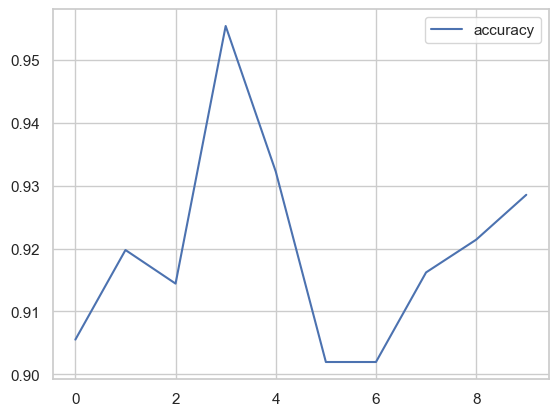

In [75]:

plt.plot(acc_list, label='accuracy')
plt.legend()
plt.show()

In [ ]:
'''Comparing the Word Scoring Methods
When we use text_to_matrix() function, we are given 4 different methods for scoring words:

binary: words are marked as 1 (present) or 0 (absent)
count: words are counted based on their occurrence (integer)
tfidf: words are scored based on their frequency of occurrence in their own document, but also are being penalized if they are common across all documents
freq: wrods are scored based on their frequency of occurrence in their own document'''

In [67]:
# prepare bag-of-words encoding of docs
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode test data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest

In [68]:
#########################
# Define the vocabulary #
#########################

from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('french')
stemmer = PorterStemmer()
    
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # filter out stop words
    tokens = [w for w in tokens if not w in stopwords]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) >= 1]
    # Stem the token
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

def add_doc_to_vocab(docs, vocab):
    '''
    input:
        docs: a list of sentences (docs)
        vocab: a vocabulary dictionary
    output:
        return an updated vocabulary
    '''
    for doc in docs:
        tokens = clean_doc(doc)
        vocab.update(tokens)
    return vocab
        
def doc_to_line(doc, vocab):
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [token for token in tokens if token in vocab]
    line = ' '.join(tokens)
    return line

def clean_docs(docs, vocab):
    lines = []
    for doc in docs:
        line = doc_to_line(doc, vocab)
        lines.append(line)
    return lines

# prepare bag-of-words encoding of docs
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode test data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest

def train_cnn(train_x, train_y, batch_size = 50, epochs = 10, verbose =2):
    
    n_words = train_x.shape[1]
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=100, kernel_size=5, activation='relu', input_shape=(n_words,1)),
        tf.keras.layers.MaxPool1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense( units=1, activation='sigmoid')
    ])
    
    model.compile( loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    model.fit(train_x, train_y, batch_size, epochs, verbose)
    return model

# prepare cross validation with 10 splits and shuffle = True
kfold = KFold(10, shuffle = True)

# Separate the sentences and the labels
descriptions, notes = list(dataset_df.Description), list(dataset_df.Note)

# Run Experiment of 4 different modes
modes = ['binary', 'count', 'tfidf', 'freq']
results = pd.DataFrame()

for mode in modes:
    print('mode: ', mode)
    acc_list = []
    
    # kfold.split() will return set indices for each split
    for train, test in kfold.split(descriptions):
        # Instantiate a vocab object
        vocab = Counter()

        train_x, test_x = [], []
        train_y, test_y = [], []

        for i in train:
            train_x.append(descriptions[i])
            train_y.append(notes[i])

        for i in test:
            test_x.append(descriptions[i])
            test_y.append(notes[i])

        # Turn the labels into a numpy array
        train_y = np.array(train_y)
        test_y = np.array(test_y)

        # Define a vocabulary for each fold
        vocab = add_doc_to_vocab(train_x, vocab)
        # print('The number of vocab: ', len(vocab))

        # Clean the sentences
        train_x = clean_docs(train_x, vocab)
        test_x = clean_docs(test_x, vocab)

        # encode data using freq mode
        Xtrain, Xtest = prepare_data(train_x, test_x, mode)
        
        Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
        Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

        # train the model
        model = train_cnn(Xtrain, train_y, verbose=0)

        # evaluate the model
        loss, acc = model.evaluate(Xtest, test_y, verbose=0)
        print('Test Accuracy: {}'.format(acc*100))

        acc_list.append(acc)
    
    results[mode] = acc_list
    acc_list = np.array(acc_list)
    print('The test ccuracy for each training:\n{}'.format(acc_list))
    print('The mean of the test accuracy: ', acc_list.mean())
    print()

print(results)

mode:  binary
Test Accuracy: 94.65240836143494
Test Accuracy: 91.97860956192017
Test Accuracy: 91.97860956192017
Test Accuracy: 96.25668525695801
Test Accuracy: 93.04812550544739
Test Accuracy: 95.72192430496216
Test Accuracy: 92.6916241645813
Test Accuracy: 91.97860956192017
Test Accuracy: 92.67857074737549
Test Accuracy: 95.53571343421936
The test ccuracy for each training:
[0.94652408 0.9197861  0.9197861  0.96256685 0.93048126 0.95721924
 0.92691624 0.9197861  0.92678571 0.95535713]
The mean of the test accuracy:  0.9365208804607391

mode:  count
Test Accuracy: 95.72192430496216
Test Accuracy: 91.80035591125488
Test Accuracy: 94.11764740943909
Test Accuracy: 92.15686321258545
Test Accuracy: 93.40463280677795
Test Accuracy: 94.65240836143494
Test Accuracy: 92.6916241645813
Test Accuracy: 94.47415471076965
Test Accuracy: 93.21428537368774
Test Accuracy: 94.46428418159485
The test ccuracy for each training:
[0.95721924 0.91800356 0.94117647 0.92156863 0.93404633 0.94652408
 0.92691624

In [69]:
results

,binary,count,tfidf,freq
0,0.946524,0.957219,0.926916,0.905526
1,0.919786,0.918004,0.925134,0.919786
2,0.919786,0.941176,0.918004,0.914438
3,0.962567,0.921569,0.935829,0.955437
4,0.930481,0.934046,0.951872,0.932264
5,0.957219,0.946524,0.935829,0.901961
6,0.926916,0.926916,0.955437,0.901961
7,0.919786,0.944742,0.939394,0.916221
8,0.926786,0.932143,0.935714,0.921429
9,0.955357,0.944643,0.951786,0.928571


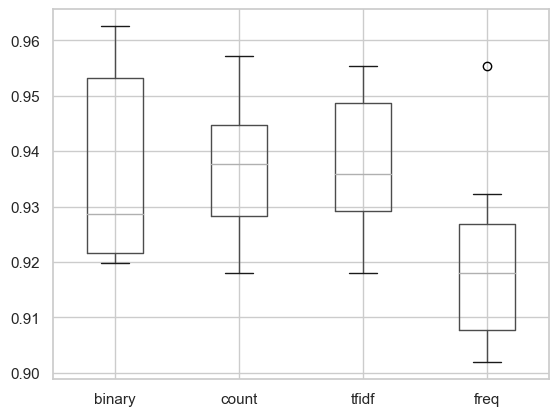

In [70]:
import seaborn as sns

results.boxplot()
plt.show()

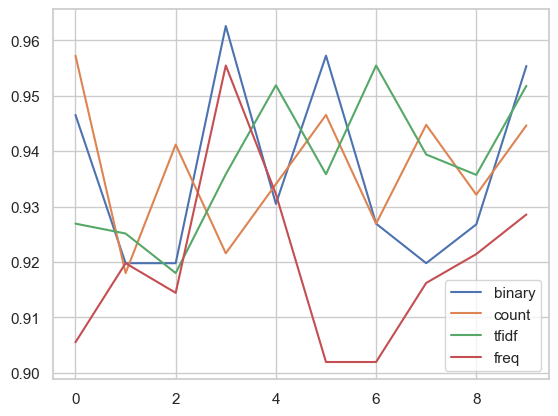

In [78]:

plt.plot(results)
plt.legend(results)
plt.show()

In [71]:
results.describe()

,binary,count,tfidf,freq
count,10.000000,10.000000,10.000000,10.000000
mean,0.936521,0.936698,0.937591,0.919759
std,0.017079,0.012326,0.012426,0.016285
min,0.919786,0.918004,0.918004,0.901961
25%,0.921536,0.928223,0.929116,0.907754
50%,0.928699,0.937611,0.935829,0.918004
75%,0.953149,0.944717,0.948688,0.926786
max,0.962567,0.957219,0.955437,0.955437


In [ ]:
#ponizej ze starego modelu

In [28]:
#Clean review text
import re

def clean_text(text):
    text = text.replace('\xa0', ' ')
    text = text.replace('\x92', "'")
    
    # Substituting multiple spaces with single space
    # Also remove '\n' and '\r' occurences
    text= re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text
 
dataset_df['Description'] = dataset_df['Description'].apply(clean_text)

In [29]:
# better display of review text in dataframes
pd.set_option('display.max_colwidth', None) 

In [30]:
dataset_df.sample(5, random_state=42)

,Note,Description,key
2891,1,"Waouh, après l'excellent the Dark Knight Cristopher Nolan nous sert enfin le plat chaud, en effet à coté d'Inception son Batman fait figure d'apéro.Inception nous plonge complétement dans un univers où le mélange du réel et de l'irréel est terrifiant et prend une place plus qu'un importante dans la vie de chacun, pour arriver à ce résultat Nolan a créer un nouveau concept du rêve étrange et bourré de virtuosité. Mis à part l'idée principale du film: celle qui l'a fait naître, Inception brille aussi par la complexité de ses personnages à l'image du veuf plein de remords qui ne sait plus comment dissocier l'irréelle du réel depuis la perte de sa femme qui dans son subconscient est plus démoniaque qu'aimable, pour retrouver une vie simple auprès de ses enfants notre héros acceptera une ultime Inception.Tout ça porté par un magnifique casting avec Léonardo Dicaprio toujours brillant, Marion Cottillard complétement terrifiante, Ellen Page qui est assurément la meilleur actrice de sa génération, et aussi à un degrés moindre Cillian Murphy et Joseph-Gordon- Lewitt. Inception à coup sur deviendra un classique à se demander si ce n'était pas qu'un beau rêve.",11
2545,0,"Beaucoup trop compliqué pour être interresant .J'ai passe mon temps a regarder l'heure , c'est trop long trop inutile on cherche l'intérêt",10
440,0,"Mais c'est quoi cette merde ? Bavardages incessants, son exécrable, musique pseudo-angoissante pendant deux heures : mais oui les Américains sont aussi capables de faire des bouses infâmes avec des gros budgets.",5
3000,1,"juste enorme! scenar/musique,et le doute à la fin du film qui fait reflechir,j'irai le revoir pour verifier certains trucs mais franchement super",0
1897,1,"Christopher Nolan a t-il réussi le film parfait ? Émouvoir, faire réfléchir, inquiéter, fasciner, Inception a tout accompli. Un Scenario magique, des acteurs qui incarnent leurs personnages comme nul autres acteurs n'aurait sans doute pu le faire. Dernier chose à dire : Une merveille Cinématographique !",7


In [31]:
min_num = min(dataset_df.groupby('Note').size())
min_num

881

In [32]:
#The text_cleaning() function will handle all necessary steps to clean our dataset.
stop_words =  stopwords.words('french')
def text_cleaning(text, remove_stop_words=True, lemmatize_words=True):
    # Clean the text, with the option to remove stop_words and to lemmatize word
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
        
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer() 
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    
    # Return a list of words
    return(text)

In [33]:
data = dataset_df.copy()

In [345]:
#clean the review
data["cleaned_review"] = data["Description"].apply(text_cleaning)

In [346]:
data.head()

Note  \
0     1   
1     1   
2     1   
3     1   
4     1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [347]:
#split features and target from  data 
#Conception du modèle
X = data["cleaned_review"]
y = data.Note.values

In [348]:
# split data into train and validate
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42,
    shuffle=True,
    stratify=y,
)

In [349]:
# Create a classifier in pipeline
sentiment_classifier = Pipeline(steps=[
                               ('pre_processing',TfidfVectorizer(lowercase=False)),
                                 ('clf',LogisticRegression())])

In [350]:
# train the sentiment classifier 
sentiment_classifier.fit(X_train,y_train)

Pipeline(steps=[('pre_processing', TfidfVectorizer(lowercase=False)),
                ('clf', LogisticRegression())])

In [351]:
# test model performance on valid data 
y_preds = sentiment_classifier.predict(X_valid)

In [352]:
accuracy_score(y_valid,y_preds)
#mon taux de 82% final c'est le taux de réussite en testant l'algo sur les mêmes données d'apprentissage

0.8188539741219963

In [353]:
#save model 
import joblib 
joblib.dump(sentiment_classifier, 'sentimentsfrench_model_pipeline.pkl')

['sentimentsfrench_model_pipeline.pkl']